In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# chuanxin
%cd "../gdrive/My Drive/cz4042_assignment_2/start_2a" 

Mounted at /gdrive
/gdrive/My Drive/cz4042_assignment_2/start_2a


In [20]:
#
# Project 2, starter code Part a
#

import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

In [21]:
# This is required when using GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


# Fixed, no need change
def load_data(file):
    with open(file, 'rb') as fo:
        try:
            samples = pickle.load(fo)
        except UnicodeDecodeError:  # python 3.x
            fo.seek(0)
            samples = pickle.load(fo, encoding='latin1')

    data, labels = samples['data'], samples['labels']

    data = np.array(data, dtype=np.float32) / 255
    labels = np.array(labels, dtype=np.int32)
    return data, labels


def make_model(num_ch_c1, num_ch_c2, use_dropout):
    ''' Note: This model is incomplete. You need to add suitable layers.
    '''

    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(3072, )))
    model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
    model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))  # Here no softmax because we have combined it with the loss
    return model


1 Physical GPUs, 1 Logical GPUs


In [22]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

num_ch_c1 = 50  # Question 2
num_ch_c2 = 60  # Question 2

epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001
optimizer_ = 'SGD'  # Question 3
use_dropout = False  # Question 3(d) (see make_model)

model = make_model(num_ch_c1, num_ch_c2, use_dropout)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

if optimizer_ == 'SGD':
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
elif optimizer_ == 'SGD-momentum':  # Question 3(a)
    raise NotImplementedError('Complete it by yourself')
elif optimizer_ == 'RMSProp':  # Question 3(b)
    raise NotImplementedError('Complete it by yourself')
elif optimizer_ == 'Adam':  # Question 3(c)
    raise NotImplementedError('Complete it by yourself')
else:
    raise NotImplementedError(f'You do not need to handle [{optimizer_}] in this project.')

# Training and test
x_train, y_train = load_data('data_batch_1')
x_test, y_test = load_data('test_batch_trim')

In [23]:
# Training
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

''' Fill in Question 1(b) here. This website may help:
        https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0
'''

# Create folder to store models and results
if not os.path.exists('./models'):
    os.mkdir('./models')
if not os.path.exists('./results'):
    os.mkdir('./results')

# Save model
if use_dropout:
    model.save(f'./models/{num_ch_c1}_{num_ch_c2}_{optimizer_}_dropout')
else:
    model.save(f'./models/{num_ch_c1}_{num_ch_c2}_{optimizer_}_no_dropout')

Epoch 1/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2857 - accuracy: 0.1252 - val_loss: 2.2631 - val_accuracy: 0.1480
Epoch 2/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.2453 - accuracy: 0.1699 - val_loss: 2.2251 - val_accuracy: 0.1795
Epoch 3/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2059 - accuracy: 0.2187 - val_loss: 2.1854 - val_accuracy: 0.2065
Epoch 4/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.1654 - accuracy: 0.2441 - val_loss: 2.1476 - val_accuracy: 0.2575
Epoch 5/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.1260 - accuracy: 0.2667 - val_loss: 2.1065 - val_accuracy: 0.2615
Epoch 6/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.0893 - accuracy: 0.2748 - val_loss: 2.0732 - val_accuracy: 0.2730
Epoch 7/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.0585 - accuracy: 0.2875 - val_loss: 2.0442 - val_accuracy: 0.2870
Epoch 

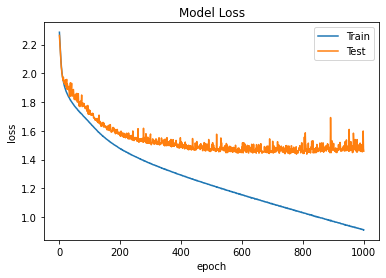

In [24]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
if use_dropout:
    plt.savefig(
        f'./results/{num_ch_c1}_{num_ch_c2}_{optimizer_}_dropout_loss.pdf')
else:
    plt.savefig(
        f'./results/{num_ch_c1}_{num_ch_c2}_{optimizer_}_no_dropout_loss.pdf'
    )

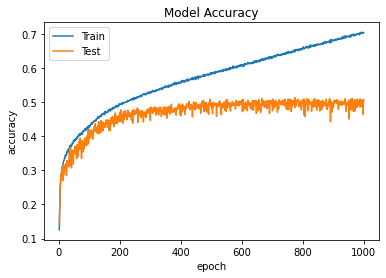

In [25]:
# Save the plot for accuracies
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
if use_dropout:
    plt.savefig(
        f'./results/{num_ch_c1}_{num_ch_c2}_{optimizer_}_dropout_accuracy.pdf'
    )
else:
    plt.savefig(
        f'./results/{num_ch_c1}_{num_ch_c2}_{optimizer_}_no_dropout_accuracy.pdf'
    )